In [2]:
import sys

sys.path.insert(0, '/Users/Cinus/Work/Progetti/WoMG/WoMG/src/')
from test_version.__main__ import womg_main

/Users/Cinus/Work/Progetti/WoMG/WoMG/src/test_version


In [3]:
import ast
import numpy as np
#import womg
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import decomposition

In [4]:
#from womg.__main__ import womg_main

In [5]:
g = nx.random_geometric_graph(100, .3)
docs_path = '../womg/womgdata/docs/demo_corpus/'
prop = womg_main(graph=g, int_mode='nmf', homophily=1., virality_resistance=13, virality_exp=8., 
          infl_strength=12., gn_strength=13,
          docs_path=docs_path, save_int=True, seed=42, single_activator=False)

Formatting graph..
Creating interests..
Extracting topic distribution from docs in  ../womg/womgdata/docs/demo_corpus


100%|██████████| 2/2 [00:00<00:00, 256.19it/s]

Computing cascades: 
WoMG diffusion has been completed.


In [28]:
prop.interests[0,99]

0.0

/Users/Cinus/miniconda3/envs/womg-test/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


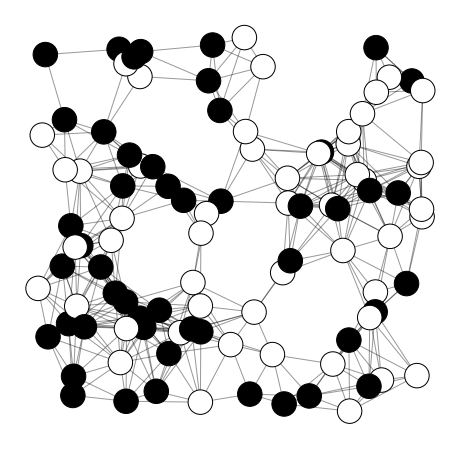

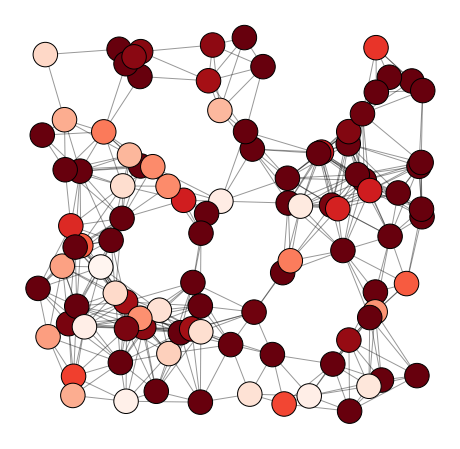

In [29]:
NODE_SIZE = 600
N = 100
G = nx.random_geometric_graph(N, 0.2, seed=42)
pos = nx.get_node_attributes(G, 'pos')

def plot_graph(node_color, cmap):
    plt.figure(figsize=(8, 8))
    nx.draw_networkx_edges(G, pos, alpha=0.4)
    nx.draw_networkx_nodes(G,
                           pos=pos,
                           node_size=NODE_SIZE,
                           alpha=1.0,
                           node_color=node_color,
                           cmap=cmap,
                           edgecolors='k'
                          )
    plt.axis('off')  
    
activations = np.zeros(N)
active_nodes = [node for _time, node in prop.propagations[0]]
activations[active_nodes] = 1
plot_graph(activations, plt.cm.binary)


component = np.argmax(prop.topic_distributions[:,0])
component_interest = [prop.interests[component,node] for node in range(N)]
plot_graph(component_interest, plt.cm.Reds_r)

In [ ]:
#fig, axs = plt.subplots(1,3, figsize=(15, 5))
fig, axs = plt.subplots(1,2, figsize=(10, 5))

#for ax, item in [(axs[0], 0), (axs[1], 1), (axs[2], None)]:
for ax, item in [(axs[0], 0), (axs[1], None)]:
    # color_map
    color_map = []
    for node in g:
        if node in df[df.item==item].node.values:
            color_map.append('black')
        else: 
            color_map.append('white')


    pos=nx.get_node_attributes(g,'pos')

    # find node near center (0.5,0.5)
    dmin=1
    ncenter=0
    for n in pos:
        x,y=pos[n]
        d=(x-0.5)**2+(y-0.5)**2
        if d<dmin:
            ncenter=n
            dmin=d
            
    # gradient based on 1-dimensional interests projection
    if item==None:
        X = []
        df_interests = pd.read_csv('../Output/Users_interests2.txt', names=['interest'], sep=';')
        for node, interest in df_interests.iterrows():
            X.append(ast.literal_eval(interest[0]))
        X = np.array(X)
        pca = decomposition.PCA(n_components=1)
        pca.fit(X)
        X = pca.transform(X)
        color_map = [x[0] for x in X]
        minimum = min(color_map)
        color_map = [x+minimum for x in color_map]
    
    # color by path length from node near center
    p=nx.single_source_shortest_path_length(g,ncenter)

    nx.draw_networkx_edges(g,pos,nodelist=[ncenter],alpha=0.25, ax=ax)
    nx.draw_networkx_nodes(g,pos,nodelist=p.keys(),
                           node_size=120,
                           node_color=color_map,
                           cmap=plt.cm.Reds_r, ax=ax)

    ax.set_xlim(-0.05,1.05)
    ax.set_ylim(-0.05,1.05)
    ax.axis('off')
    title = 'Item '+str(item) if item in (0,1) else 'Interests'
    ax.set_title(title)
    #nx.draw(g, node_color=color_map, with_labels=True, ax=ax)


plt.tight_layout()
plt.savefig('network-items-plot.pdf')
plt.show()

In [ ]:
! rm -r ../Output/